# Tech Stock Prices
This dataset consists of the daily stock prices and volume of ten different tech companies: Apple (AAPL), Amazon (AMZN), Alibaba (BABA), Salesforce (CRM), Facebook (FB), Alphabet (GOOG), Intel (INTC), Microsoft (MSFT), Nvidia (NVDA), and Tesla (TSLA).

There are ten CSV files in the `data/` folder named with the stock symbol for each of the ten companies listed above. 
Looking for another company? You can download it from [Yahoo Finance](https://finance.yahoo.com/) and upload it to your workspace.

Not sure where to begin? Scroll to the bottom to find challenges!

In [1]:
import pandas as pd
aapl = pd.read_csv("data/AAPL.csv")
print(aapl.shape)
aapl.head(10)

(2999, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564355,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459939,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447999,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490865,447610800
5,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.433607,462229600
6,2010-01-12,7.471071,7.491786,7.372143,7.418571,6.360425,594459600
7,2010-01-13,7.423929,7.533214,7.289286,7.523214,6.450142,605892000
8,2010-01-14,7.503929,7.516429,7.465000,7.479643,6.412785,432894000
9,2010-01-15,7.533214,7.557143,7.352500,7.354643,6.305614,594067600


## Data Dictionary

| Column    | Explanation                                                                            |
| --------- | -------------------------------------------------------------------------------------- |
| Date      | Date of observation                                                                    |
| Open      | Opening price                                                                          |
| High      | Highest price during trading day                                                       |
| Low       | Lowest price during trading day                                                        |
| Close     | Close price                                                                            |
| Adj Close | Adjusted close price adjusted for splits and dividend and/or capital gain distribution |
| Volume    | Number of shares traded during trading day                                             |

In [2]:
import os
import pandas as pd

# Directory containing the CSV files
data_dir = "data/"

# List to hold individual dataframes
dfs = []

# Loop through all files in the directory
for file in os.listdir(data_dir):
    if file.endswith(".csv"):
        # Read the CSV file into a dataframe
        df = pd.read_csv(os.path.join(data_dir, file))
        # Extract the stock name from the file name (assuming the file name is the stock name)
        stock_name = file.split(".")[0]
        # Add a new column for the stock name
        df['Stock'] = stock_name
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all dataframes into a single dataframe
all_stocks_df = pd.concat(dfs, ignore_index=True)

# Display the first few rows of the concatenated dataframe
all_stocks_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2014-09-22,92.699997,92.949997,89.500000,89.889999,89.889999,66657800,BABA
1,2014-09-23,88.940002,90.480003,86.620003,87.169998,87.169998,39009800,BABA
2,2014-09-24,88.470001,90.570000,87.220001,90.570000,90.570000,32088000,BABA
3,2014-09-25,91.089996,91.500000,88.500000,88.919998,88.919998,28598000,BABA
4,2014-09-26,89.730003,90.459999,88.660004,90.459999,90.459999,18340000,BABA


In [6]:
all_stocks_df.groupby('Stock')['Date'].max()

Stock
AAPL    2021-11-30
AMZN    2021-11-30
BABA    2021-11-30
CRM     2021-11-30
FB      2021-11-30
GOOG    2021-11-30
INTC    2021-11-29
MSFT    2021-11-30
NVDA    2021-11-30
TSLA    2021-11-30
Name: Date, dtype: object

In [14]:
# Filter the dataframe for the date 2021-11-30
date_filtered_df = all_stocks_df[all_stocks_df['Date'] == '2021-11-30'].reset_index(drop = True)

# Sort the closing prices from highest to lowest
sorted_close_prices = date_filtered_df.sort_values(by='Close', ascending=False)[['Stock', 'Close']].round(1)

sorted_close_prices

,Stock,Close
1,AMZN,3507.1
6,GOOG,2849.0
7,TSLA,1144.8
3,MSFT,330.6
8,NVDA,326.8
5,FB,324.5
4,CRM,285.0
2,AAPL,165.3
0,BABA,127.5


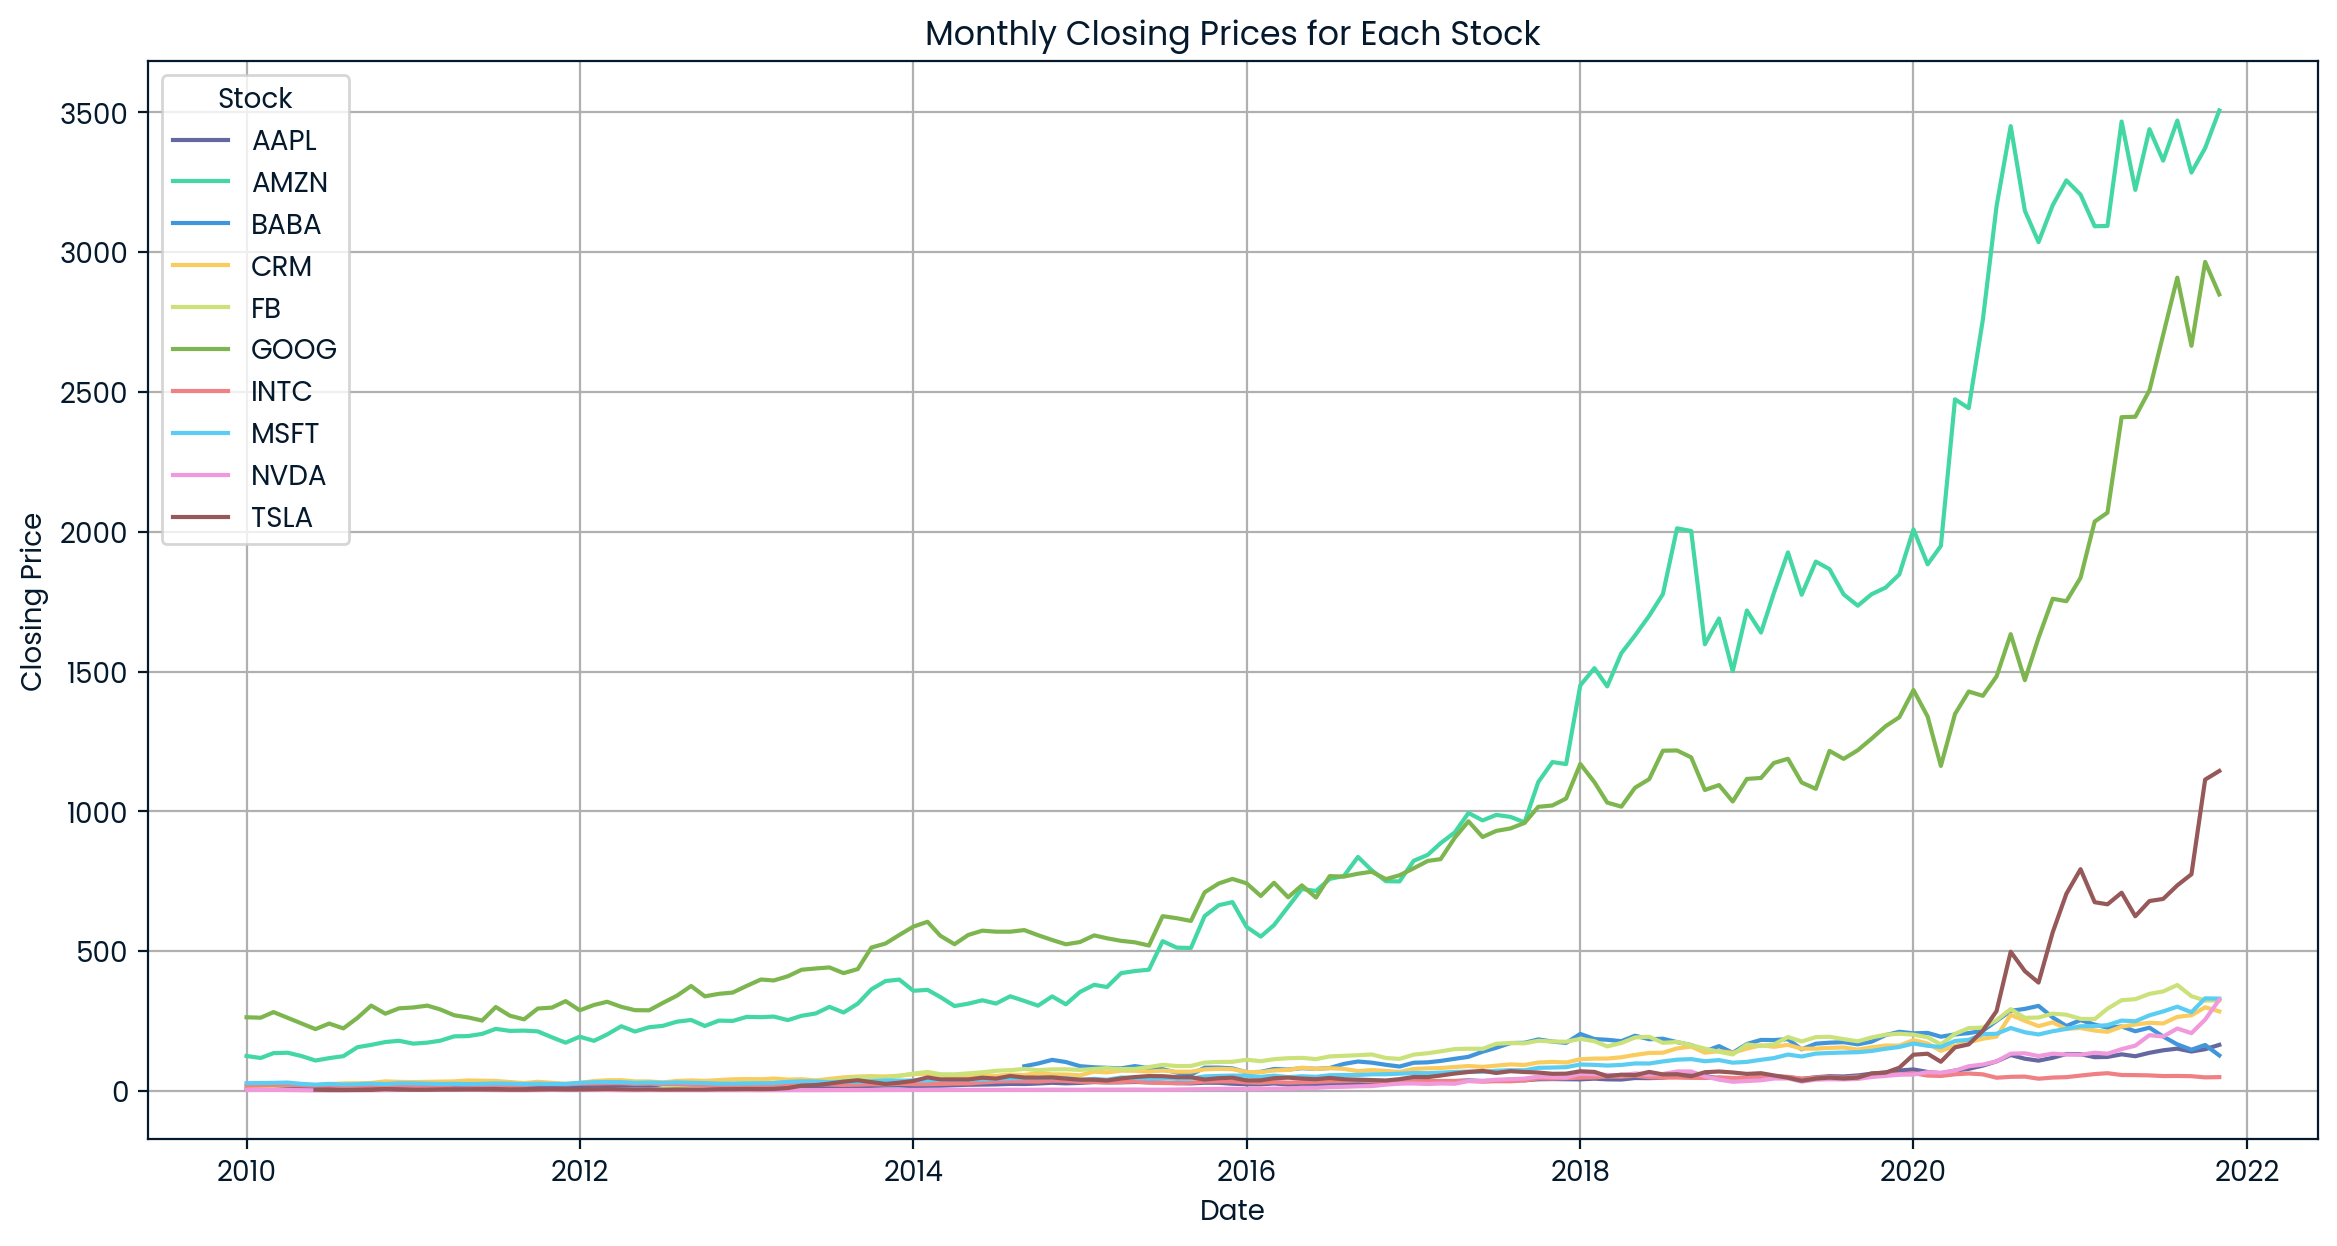

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'Date' column to datetime format
all_stocks_df['Date'] = pd.to_datetime(all_stocks_df['Date'])

# Extract year and month from the 'Date' column
all_stocks_df['YearMonth'] = all_stocks_df['Date'].dt.to_period('M')

# Group by 'Stock' and 'YearMonth' and get the last closing price of each month
monthly_close_prices = all_stocks_df.groupby(['Stock', 'YearMonth'])['Close'].last().reset_index()

# Convert 'YearMonth' back to datetime for plotting
monthly_close_prices['YearMonth'] = monthly_close_prices['YearMonth'].dt.to_timestamp()

# Plot the data
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_close_prices, x='YearMonth', y='Close', hue='Stock')
plt.title('Monthly Closing Prices for Each Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend(title='Stock')
plt.grid(True)
plt.show()

In [18]:
# Calculate the percent increase in closing price for each stock between its first and last closing price
all_stocks_df['Percent Increase'] = all_stocks_df.groupby('Stock')['Close'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Get the first and last entry for each stock to ensure we have the correct percent increase
first_last_close = all_stocks_df.groupby('Stock').agg({'Close': ['first', 'last']}).reset_index()
first_last_close.columns = ['Stock', 'First Close', 'Last Close']

# Calculate the total percent increase
first_last_close['Percent Increase'] = (first_last_close['Last Close'] - first_last_close['First Close']) / first_last_close['First Close'] * 100

# Sort the stocks by percent increase in descending order
sorted_percent_increase = first_last_close[['Stock', 'Percent Increase']].sort_values(by='Percent Increase', ascending=False).reset_index(drop=True)

sorted_percent_increase

,Stock,Percent Increase
0,TSLA,23919.303609
1,NVDA,6968.902326
2,AMZN,2519.171191
3,AAPL,2062.702798
4,CRM,1423.442882
5,MSFT,968.142117
6,FB,853.452837
7,GOOG,812.554927
8,INTC,139.463613
9,BABA,41.873401


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `all_stocks_df` contains both the tech stocks and commodities data
# Separate tech stocks and commodities
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB', 'TSLA', 'NVDA', 'ADBE', 'NFLX', 'INTC']
commodities = ['Coffee', 'Cocoa', 'Sugar']

tech_stocks_df = all_stocks_df[all_stocks_df['Stock'].isin(tech_stocks)]
commodities_df = all_stocks_df[all_stocks_df['Stock'].isin(commodities)]

# Calculate daily returns
tech_stocks_df['Daily Return'] = tech_stocks_df.groupby('Stock')['Close'].pct_change()
commodities_df['Daily Return'] = commodities_df.groupby('Stock')['Close'].pct_change()

# Calculate mean returns and volatilities
tech_summary = tech_stocks_df.groupby('Stock')['Daily Return'].agg(['mean', 'std']).reset_index()
commodities_summary = commodities_df.groupby('Stock')['Daily Return'].agg(['mean', 'std']).reset_index()

# Rename columns for clarity
tech_summary.columns = ['Stock', 'Mean Return', 'Volatility']
commodities_summary.columns = ['Stock', 'Mean Return', 'Volatility']

# Plotting the returns and volatilities
plt.figure(figsize=(14, 7))
sns.scatterplot(data=tech_summary, x='Volatility', y='Mean Return', hue='Stock', style='Stock', s=100, palette='tab10')
sns.scatterplot(data=commodities_summary, x='Volatility', y='Mean Return', hue='Stock', style='Stock', s=100, palette='tab20')

plt.title('Returns and Volatilities of Tech Stocks and Commodities')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Mean Return (Average Daily Return)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Portfolio optimization
# Assuming equal weights for simplicity
tech_weights = np.array([1/len(tech_stocks)] * len(tech_stocks))
commodities_weights = np.array([1/len(commodities)] * len(commodities))

# Calculate portfolio returns and volatilities
tech_portfolio_return = np.sum(tech_weights * tech_summary['Mean Return'])
tech_portfolio_volatility = np.sqrt(np.dot(tech_weights.T, np.dot(tech_stocks_df.pivot_table(index='Date', columns='Stock', values='Daily Return').cov(), tech_weights)))

commodities_portfolio_return = np.sum(commodities_weights * commodities_summary['Mean Return'])
commodities_portfolio_volatility = np.sqrt(np.dot(commodities_weights.T, np.dot(commodities_df.pivot_table(index='Date', columns='Stock', values='Daily Return').cov(), commodities_weights)))

# Combine tech stocks and commodities into a single portfolio
combined_weights = np.concatenate((tech_weights, commodities_weights))
combined_returns = pd.concat([tech_stocks_df, commodities_df]).pivot_table(index='Date', columns='Stock', values='Daily Return')
combined_portfolio_return = np.sum(combined_weights * combined_returns.mean())
combined_portfolio_volatility = np.sqrt(np.dot(combined_weights.T, np.dot(combined_returns.cov(), combined_weights)))

# Report preparation
report = f"""
# Investment Analysis Report

## Motivation
The investment firm is looking to expand its portfolio by including technology stocks alongside its current investments in commodities (coffee, cocoa, and sugar). This report explores the returns and volatilities of the selected tech stocks and compares them with the existing commodities. The goal is to recommend a strategy to integrate tech stocks into the portfolio to minimize risk while gaining exposure to the new market.

## Steps
1. **Data Preparation**: Separated the data into tech stocks and commodities.
2. **Daily Returns Calculation**: Calculated the daily returns for each stock and commodity.
3. **Summary Statistics**: Computed the mean returns and volatilities for both tech stocks and commodities.
4. **Visualization**: Plotted the returns and volatilities to visually compare the two groups.
5. **Portfolio Optimization**: Calculated the returns and volatilities for tech stocks, commodities, and a combined portfolio.

## Findings
- **Tech Stocks**: The tech stocks generally show higher mean returns but also higher volatilities compared to commodities.
- **Commodities**: The commodities have lower mean returns and volatilities, indicating more stable but less profitable investments.
- **Combined Portfolio**: Integrating tech stocks with commodities can potentially balance the high returns of tech stocks with the stability of commodities.

## Recommendations
To minimize risk while gaining exposure to the tech market, the firm should consider a diversified portfolio that includes both tech stocks and commodities. By carefully balancing the weights, the firm can achieve a desirable risk-return profile.

### Portfolio Statistics
- **Tech Portfolio**: Mean Return = {tech_portfolio_return:.4f}, Volatility = {tech_portfolio_volatility:.4f}
- **Commodities Portfolio**: Mean Return = {commodities_portfolio_return:.4f}, Volatility = {commodities_portfolio_volatility:.4f}
- **Combined Portfolio**: Mean Return = {combined_portfolio_return:.4f}, Volatility = {combined_portfolio_volatility:.4f}

## Conclusion
The integration of tech stocks into the existing commodities portfolio can provide a balanced approach to investment, offering higher returns while managing risk effectively. The firm should consider a diversified strategy to optimize its portfolio performance.
"""

# Display the report
from IPython.display import Markdown, display
display(Markdown(report))

[Source](https://finance.yahoo.com/) of dataset.

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which of the ten companies has the highest closing price based on the most recent data?
- 📊 **Visualize**: Create a plot that visualizes the closing price at the end of each month for the 10 tech stocks.
- 🔎 **Analyze**: Which of the ten companies have experienced the greatest percent increase in closing price over the course of their existence?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You have been hired as an analyst for a small investment firm. They currently specialize in commodities, focusing on coffee, cocoa, and sugar. However, they are now interested in expanding to technology companies. Your manager has asked you to explore the returns and volatilities of the ten stocks provided and contrast them with the three commodities they currently invest in. 

They also want you to recommend how tech stocks could be integrated into a portfolio with the existing commodities they invest in to minimize risk while gaining exposure to the new market.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

Commodity prices can be found [here](https://finance.yahoo.com/commodities/).